In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import plotly.express as px
import pandas as pd

In [2]:
df = pd.read_csv("data/1950-2022_all_tornados.csv")
df

om    yr  mo  dy        date      time               tz  \
0         192  1950  10   1  1950-10-01  21:00:00  America/Chicago   
1         193  1950  10   9  1950-10-09  02:15:00  America/Chicago   
2         195  1950  11  20  1950-11-20  02:20:00  America/Chicago   
3         196  1950  11  20  1950-11-20  04:00:00  America/Chicago   
4         197  1950  11  20  1950-11-20  07:30:00  America/Chicago   
...       ...   ...  ..  ..         ...       ...              ...   
68688  621922  2022   9  28  2022-09-28  13:32:00  America/Chicago   
68689  621923  2022   9  30  2022-09-30  10:25:00  America/Chicago   
68690  621924  2022   9  30  2022-09-30  13:22:00  America/Chicago   
68691  621900  2022   9   4  2022-09-04  15:44:00  America/Chicago   
68692  621901  2022   9   9  2022-09-09  23:21:00  America/Chicago   

               datetime_utc  st  stf  ...      elon    len  wid  ns  sn   f1  \
0      1950-10-02T03:00:00Z  OK   40  ... -102.3000  15.80   10   1   1   25   
1      1950-10-09T08:15:00Z  NC   37  ...    0.0000   2.00  880   1   1   47   
2      1950-11-20T08:20:00Z  KY   21  ...    0.0000   0.10   10   1   1  177   
3      1950-11-20T10:00:00Z  KY   21  ...    0.0000   0.10   10   1   1  209   
4      1950-11-20T13:30:00Z  MS   28  ...    0.0000   2.00   37   1   1  101   
...                     ...  ..  ...  ...       ...    ...  ...  ..  ..  ...   
68688  2022-09-28T18:32:00Z  FL   12  ...  -80.8841   3.00  100   1   1    9   
68689  2022-09-30T15:25:00Z  NC   37  ...  -78.3011   0.74   20   1   1   19   
68690  2022-09-30T18:22:00Z  NC   37  ...  -76.7147   0.70   12   1   1   13   
68691  2022-09-04T20:44:00Z  OH   39  ...  -80.6555   0.07   15   1   1   99   
68692  2022-09-10T04:21:00Z  SC   45  ...  -79.7537   0.68  125   1   1   19   

       f2  f3  f4     fc  
0       0   0   0  False  
1       0   0   0  False  
2       0   0   0  False  
3       0   0   0  False  
4       0   0   0  False  
...    ..  ..  ..    ...  
68688   0   0   0  False  
68689   0   0   0  False  
68690   0   0   0  False  
68691   0   0   0  False  
68692   0   0   0  False  

[68693 rows x 27 columns]

In [3]:
df['group'] = df['st']

In [4]:
df['group']=df['group'].replace({
'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
})

In [5]:
df1 = df[[
'yr',
'mo',
'date',
'st',
'mag',
'inj',
'fat',
'loss',
'len',
'wid',
'slat',
'slon',
'group']]
df1.head()

yr  mo        date  st  mag  inj  fat      loss   len  wid   slat  \
0  1950  10  1950-10-01  OK  1.0    0    0   50000.0  15.8   10  36.73   
1  1950  10  1950-10-09  NC  3.0    3    0  500000.0   2.0  880  34.17   
2  1950  11  1950-11-20  KY  2.0    0    0  500000.0   0.1   10  37.37   
3  1950  11  1950-11-20  KY  1.0    0    0  500000.0   0.1   10  38.20   
4  1950  11  1950-11-20  MS  1.0    3    0   50000.0   2.0   37  32.42   

     slon group  
0 -102.52     S  
1  -78.60     S  
2  -87.20     S  
3  -84.50     S  
4  -89.13     S

In [6]:
data = {'StName':['Alabama',
'Alaska',
'Arizona',
'Arkansas',
'California',
'Colorado',
'Connecticut',
'Delaware',
'Florida',
'Georgia',
'Hawaii',
'Idaho',
'Illinois',
'Indiana',
'Iowa',
'Kansas',
'Kentucky',
'Louisiana',
'Maine',
'Maryland',
'Massachusetts',
'Michigan',
'Minnesota',
'Mississippi',
'Missouri',
'Montana',
'Nebraska',
'Nevada',
'New Hampshire',
'New Jersey',
'New Mexico',
'New York',
'North Carolina',
'North Dakota',
'Ohio',
'Oklahoma',
'Oregon',
'Pennsylvania',
'Rhode Island',
'South Carolina',
'South Dakota',
'Tennessee',
'Texas',
'Utah',
'Vermont',
'Virginia',
'Washington',
'West Virginia',
'Wisconsin',
'Wyoming']}

df = pd.DataFrame(data)
cw_filename = 'state_codes.html'

states = pd.read_html(cw_filename)[0]
state_code_map = dict(zip(states['Description'], 
                          states['Code']))
df['StAbbr'] = df['StName'].map(state_code_map)
code_state_map = dict(zip(states['Code'],
                          states['Description']))
df['StNameAgain'] = df['StAbbr'].map(code_state_map)
df
df = df.rename(columns={'stName': 'State_Name', 'StAbbr': 'st'})
df.head()

StName  st StNameAgain
0     Alabama  AL     Alabama
1      Alaska  AK      Alaska
2     Arizona  AZ     Arizona
3    Arkansas  AR    Arkansas
4  California  CA  California

In [7]:
new_df2 = pd.merge(df1, df, on='st', how='left')
new_df2
df3 = new_df2[[
'yr',
'mo',
'date',
'st',
'StName',
'mag',
'inj',
'fat',
'loss',
'len',
'wid',
'slat',
'slon',
'group']]
df3

yr  mo        date  st          StName  mag  inj  fat      loss  \
0      1950  10  1950-10-01  OK        Oklahoma  1.0    0    0   50000.0   
1      1950  10  1950-10-09  NC  North Carolina  3.0    3    0  500000.0   
2      1950  11  1950-11-20  KY        Kentucky  2.0    0    0  500000.0   
3      1950  11  1950-11-20  KY        Kentucky  1.0    0    0  500000.0   
4      1950  11  1950-11-20  MS     Mississippi  1.0    3    0   50000.0   
...     ...  ..         ...  ..             ...  ...  ...  ...       ...   
68688  2022   9  2022-09-28  FL         Florida  0.0    0    0       NaN   
68689  2022   9  2022-09-30  NC  North Carolina  0.0    0    0       NaN   
68690  2022   9  2022-09-30  NC  North Carolina  NaN    0    0       NaN   
68691  2022   9  2022-09-04  OH            Ohio  0.0    0    0   12000.0   
68692  2022   9  2022-09-09  SC  South Carolina  0.0    0    0       NaN   

         len  wid     slat      slon group  
0      15.80   10  36.7300 -102.5200     S  
1       2.00  880  34.1700  -78.6000     S  
2       0.10   10  37.3700  -87.2000     S  
3       0.10   10  38.2000  -84.5000     S  
4       2.00   37  32.4200  -89.1300     S  
...      ...  ...      ...       ...   ...  
68688   3.00  100  28.0830  -80.8669     S  
68689   0.74   20  33.9128  -78.2882     S  
68690   0.70   12  35.3242  -76.7076     S  
68691   0.07   15  41.0210  -80.6559     M  
68692   0.68  125  32.8750  -79.7514     S  

[68693 rows x 14 columns]

In [8]:
df3 = df3.rename(columns={ "StName": "name", "yr": "year"})

In [9]:
df3["value"] = df3.groupby("name").cumcount()+1

In [11]:
df = df3

In [12]:
df = df[['name', 'group', 'year', 'value']]
df.tail(59)

name group  year   value
68634    North Dakota     M  2022  1631.0
68635    North Dakota     M  2022  1632.0
68636    North Dakota     M  2022  1633.0
68637       Louisiana     S  2022  2270.0
68638            Iowa     M  2022  2815.0
68639        Illinois     M  2022  2712.0
68640        Illinois     M  2022  2713.0
68641         Indiana     M  2022  1556.0
68642         Arizona     W  2022   276.0
68643           Texas     S  2022  9262.0
68644           Texas     S  2022  9263.0
68645     Mississippi     S  2022  2594.0
68646           Texas     S  2022  9264.0
68647         Arizona     W  2022   277.0
68648         Montana     W  2022   434.0
68649       Louisiana     S  2022  2271.0
68650       Minnesota     M  2022  2089.0
68651       Minnesota     M  2022  2090.0
68652       Minnesota     M  2022  2091.0
68653       Minnesota     M  2022  2092.0
68654       Minnesota     M  2022  2093.0
68655      California     W  2022   466.0
68656       Minnesota     M  2022  2094.0
68657          Kansas     M  2022  4429.0
68658        Illinois     M  2022  2714.0
68659        Illinois     M  2022  2715.0
68660        Michigan     W  2022  1074.0
68661        Michigan     W  2022  1075.0
68662   West Virginia     S  2022   146.0
68663    Pennsylvania     N  2022   909.0
68664        Maryland     N  2022   395.0
68665        Colorado     W  2022  2337.0
68666         Florida     S  2022  3552.0
68667           Texas     S  2022  9265.0
68668         Arizona     W  2022   278.0
68669         Arizona     W  2022   279.0
68670        Illinois     M  2022  2716.0
68671        New York     N  2022   481.0
68672      New Mexico     W  2022   636.0
68673        New York     N  2022   482.0
68674        New York     N  2022   483.0
68675         Florida     S  2022  3553.0
68676         Florida     S  2022  3554.0
68677         Florida     S  2022  3555.0
68678         Florida     S  2022  3556.0
68679         Florida     S  2022  3557.0
68680         Florida     S  2022  3558.0
68681         Florida     S  2022  3559.0
68682         Florida     S  2022  3560.0
68683         Florida     S  2022  3561.0
68684         Florida     S  2022  3562.0
68685         Florida     S  2022  3563.0
68686         Florida     S  2022  3564.0
68687         Florida     S  2022  3565.0
68688         Florida     S  2022  3566.0
68689  North Carolina     S  2022  1449.0
68690  North Carolina     S  2022  1450.0
68691            Ohio     M  2022  1223.0
68692  South Carolina     S  2022  1141.0

In [13]:
df['group']=df['group'].replace({
        'M': 'Midwest',
        'S': 'South',
        'W': 'West',
        'N': 'North',
})

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_20556\3269868523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group']=df['group'].replace({


In [14]:
test = df.groupby(['year', 'name']).max()
test.head(50)

group  value
year name                          
1950 Alabama           South    2.0
     Arkansas          South   12.0
     Colorado           West    2.0
     Connecticut       North    2.0
     Florida           South    6.0
     Georgia           South    4.0
     Illinois        Midwest    8.0
     Indiana         Midwest    3.0
     Iowa            Midwest    4.0
     Kansas          Midwest   30.0
     Kentucky          South    2.0
     Louisiana         South   20.0
     Maryland          North    1.0
     Minnesota       Midwest    1.0
     Mississippi       South   14.0
     Missouri        Midwest    6.0
     Nebraska           West    6.0
     New Mexico         West    2.0
     North Carolina    South    9.0
     North Dakota    Midwest    2.0
     Ohio            Midwest    3.0
     Oklahoma          South   23.0
     Pennsylvania      North    5.0
     South Carolina    South    1.0
     South Dakota    Midwest    1.0
     Tennessee         South    3.0
     Texas             South   20.0
     West Virginia     South    1.0
     Wisconsin       Midwest    5.0
     Wyoming            West    3.0
1951 Alabama           South    7.0
     Arkansas          South   14.0
     California         West    1.0
     Colorado           West   10.0
     Connecticut       North    5.0
     Florida           South   15.0
     Georgia           South    7.0
     Illinois        Midwest   13.0
     Indiana         Midwest    7.0
     Iowa            Midwest    9.0
     Kansas          Midwest  107.0
     Kentucky          South    4.0
     Louisiana         South   29.0
     Massachusetts     North    2.0
     Michigan           West    8.0
     Minnesota       Midwest    4.0
     Mississippi       South   22.0
     Missouri        Midwest   12.0
     Nebraska           West   15.0
     New Hampshire     North    1.0

In [15]:
test.tail(50)

group   value
year name                           
2021 Utah               West   134.0
     Vermont           North    46.0
     Virginia          South   787.0
     Washington         West   125.0
     West Virginia     South   143.0
     Wisconsin       Midwest  1467.0
     Wyoming            West   711.0
2022 Alabama           South  2456.0
     Arizona            West   279.0
     Arkansas          South  1952.0
     California         West   466.0
     Colorado           West  2337.0
     Connecticut       North   121.0
     Florida           South  3566.0
     Georgia           South  1843.0
     Idaho              West   219.0
     Illinois        Midwest  2716.0
     Indiana         Midwest  1556.0
     Iowa            Midwest  2815.0
     Kansas          Midwest  4429.0
     Kentucky          South  1099.0
     Louisiana         South  2271.0
     Maryland          North   395.0
     Michigan           West  1075.0
     Minnesota       Midwest  2094.0
     Mississippi       South  2594.0
     Missouri        Midwest  2441.0
     Montana            West   434.0
     Nebraska           West  2993.0
     New Hampshire     North    96.0
     New Jersey        North   172.0
     New Mexico         West   636.0
     New York          North   483.0
     North Carolina    South  1450.0
     North Dakota    Midwest  1633.0
     Ohio            Midwest  1223.0
     Oklahoma          South  4144.0
     Oregon             West   125.0
     Pennsylvania      North   909.0
     South Carolina    South  1141.0
     South Dakota    Midwest  1898.0
     Tennessee         South  1335.0
     Texas             South  9265.0
     Utah               West   135.0
     Vermont           North    48.0
     Virginia          South   803.0
     Washington         West   127.0
     West Virginia     South   146.0
     Wisconsin       Midwest  1495.0
     Wyoming            West   713.0

In [16]:
test = test.reset_index()
test = test.set_index('name')

In [17]:
test = test.reset_index()

In [18]:
test = test[['name', 'group', 'year', 'value']]
test

name    group  year   value
0           Alabama    South  1950     2.0
1          Arkansas    South  1950    12.0
2          Colorado     West  1950     2.0
3       Connecticut    North  1950     2.0
4           Florida    South  1950     6.0
...             ...      ...   ...     ...
3100       Virginia    South  2022   803.0
3101     Washington     West  2022   127.0
3102  West Virginia    South  2022   146.0
3103      Wisconsin  Midwest  2022  1495.0
3104        Wyoming     West  2022   713.0

[3105 rows x 4 columns]

In [19]:
current_year = 2022
dff = (test[test['year'].eq(current_year)]
       .sort_values(by='value', ascending=True)
       .head(10))
dff

name  group  year  value
3099        Vermont  North  2022   48.0
3084  New Hampshire  North  2022   96.0
3067    Connecticut  North  2022  121.0
3092         Oregon   West  2022  125.0
3101     Washington   West  2022  127.0
3098           Utah   West  2022  135.0
3102  West Virginia  South  2022  146.0
3085     New Jersey  North  2022  172.0
3070          Idaho   West  2022  219.0
3063        Arizona   West  2022  279.0

<BarContainer object of 10 artists>

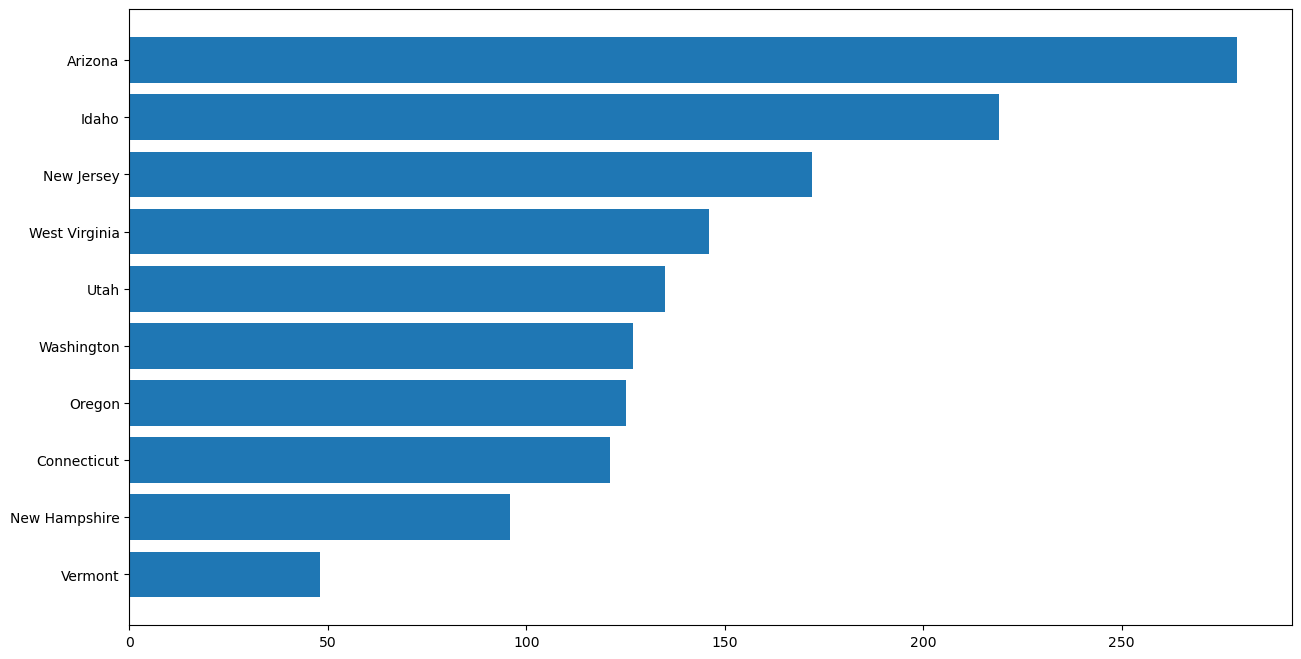

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['value'])

In [21]:
colors = dict(zip(
    ['South', 'West', 'North',
     'Midwest'],
    ['#ffb3ff', '#90d595', '#e48381',
     '#aafbff']
))
group_lk = df.set_index('name')['group'].to_dict()

Text(1, 0.4, '2022')

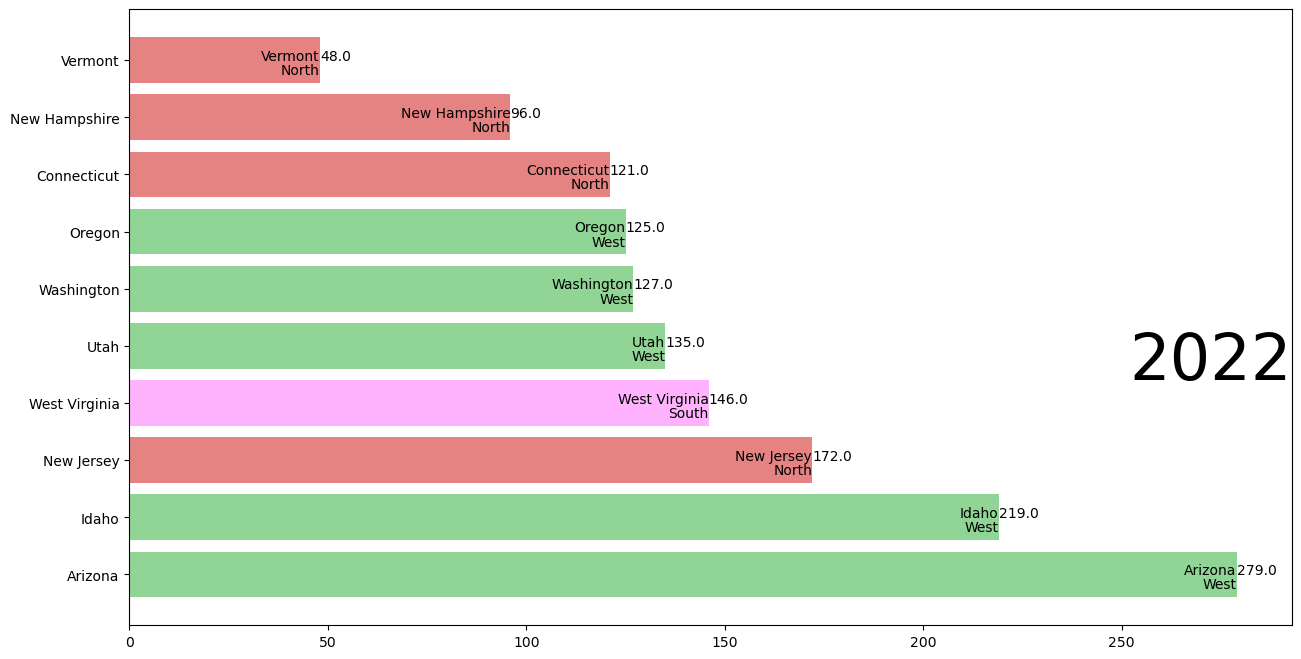

In [22]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
# iterate over the values to plot labels and values 
for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
    ax.text(value, i,     name,            ha='right')  
    ax.text(value, i-.25, group_lk[name],  ha='right')  
    ax.text(value, i,     value,           ha='left')   
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

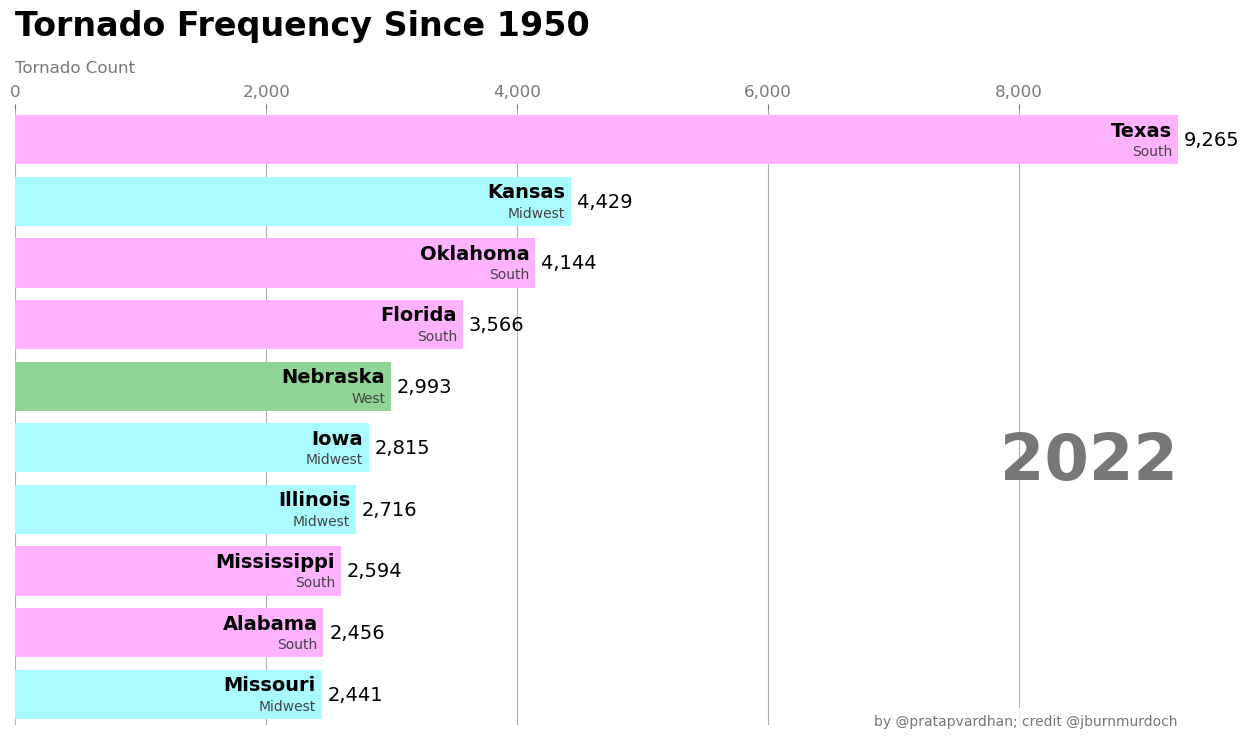

In [24]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = test[test['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Tornado Count', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Tornado Frequency Since 1950',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2022)

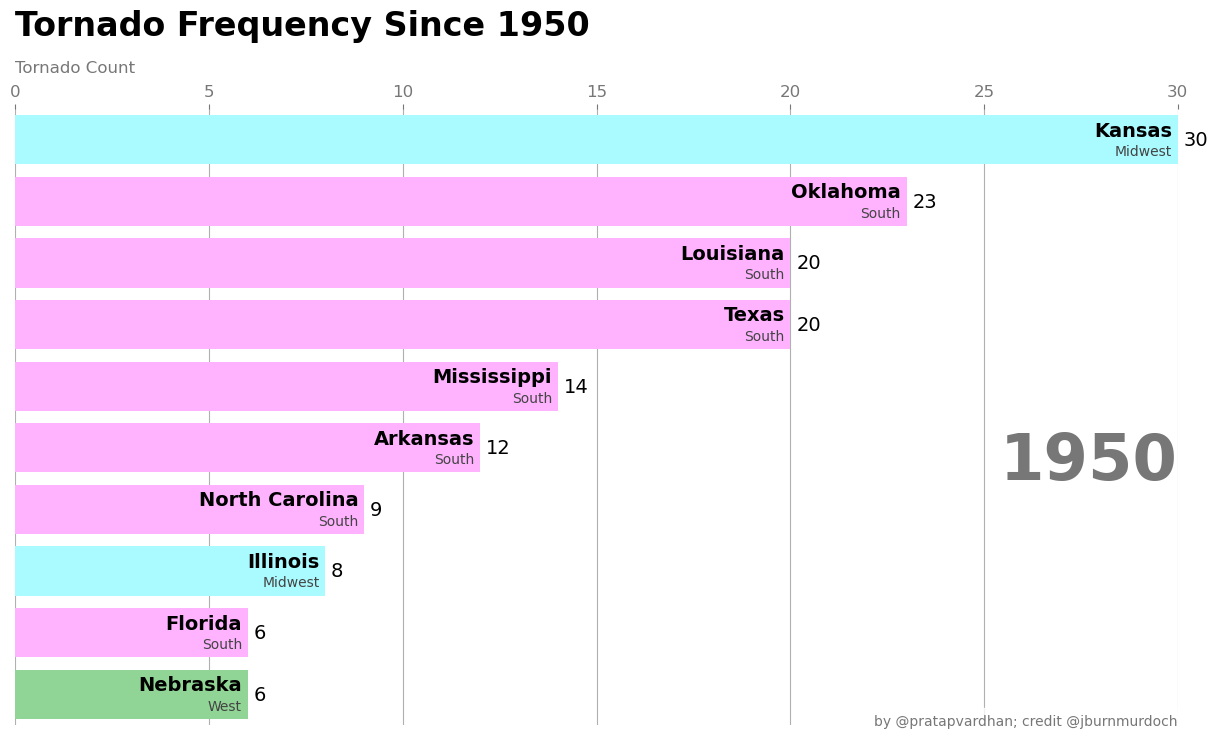

In [29]:
fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart(1950)

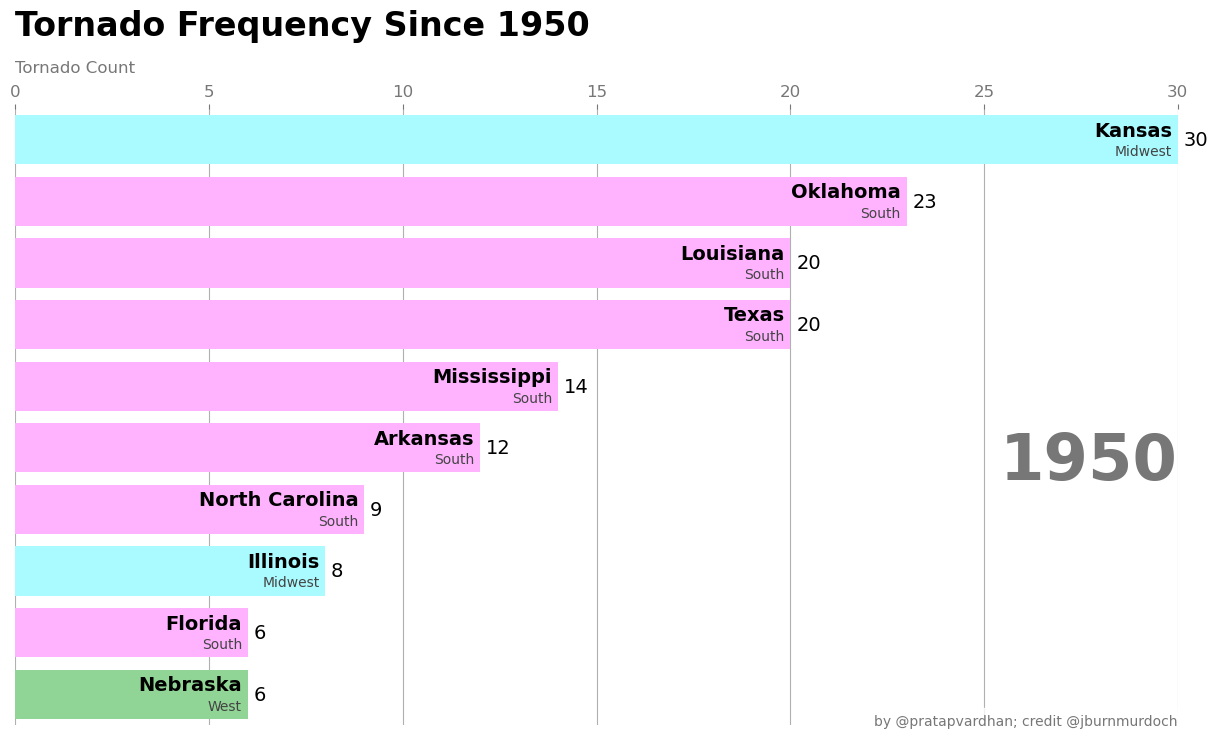

In [26]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1950, 2023))
HTML(animator.to_jshtml())

In [30]:
test['name']=test['name'].replace({
'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'})
test

name    group  year   value
0      AL    South  1950     2.0
1      AR    South  1950    12.0
2      CO     West  1950     2.0
3      CT    North  1950     2.0
4      FL    South  1950     6.0
...   ...      ...   ...     ...
3100   VA    South  2022   803.0
3101   WA     West  2022   127.0
3102   WV    South  2022   146.0
3103   WI  Midwest  2022  1495.0
3104   WY     West  2022   713.0

[3105 rows x 4 columns]

In [55]:
maps = px.choropleth(test, 
              locations = 'name',
              color="value", 
              animation_frame="year",
              color_continuous_scale="sunsetdark",
              locationmode='USA-states',
              scope="usa",
              range_color=(0, 8000),
              title='Tornado Frequency 1950-2022',
              height=600
             )

In [56]:
maps

In [45]:

# importing packages 
import plotly.express as px 
  
fig = px.colors.sequential.swatches_continuous() 
fig.show() 

In [57]:
maps.write_html("fatalities_map.html")